Positional Encoding in Transformers
-----------------------------------

Positional encoding is a crucial piece in transformer architecture. It can be tricky at first as it is not intutive compared to many other concepts like convolutions in a CNN which can be easily visualized. In this blog, I would try to crystallize the concept of positional encoding by using detailed illustrations and Python code, making it more intuitive and easier to grasp for readers.

Why Positional Encoding?
-----------------------
Transformer models are incredibly powerful at processing text sequence. The transformer is capable of processing all the words in a sequence at once opposed to models like RNNs or LSTMs. This brings another challange of how to keep track of the word order in a sentence. 
For example, 
"The dog chased the cat."
"The cat chased the dog."
would appear similar to transformer without positional encoding. Both sentences have same words which could cause confusion in understanding without any information of word order. In natural language, the context of a word is heavily influenced by its position relative to other words. Without positional encoding, a Transformer wouldn’t be able to determine whether a word was early in the sentence or at the end, making it much harder to capture contextual relationships between words, such as subject-object dependencies, which are crucial for understanding meaning.

Let's say, the model see's a sequence "Transformer models are incredibly powerful". 

The following code generates a embedding matrix which is randomly initialized and the token can be represented in two dimensions. The embeddings is what transformer gonna see. 

"Transformer models are incredibly powerful" is fed to the transformer model after encoding. For the sake of simplicity, only the tokens in this sentence form the vocabulary and the token embedding is represented in two dimensional plane. 

{'Transformer': array([0.6 , 0.71]), 'models': array([0.16, 0.16]), 'are': array([0.37, 0.95]), 'incredibly': array([0.73, 0.6 ]), 'powerful': array([0.06, 0.87])}
(5, 2)


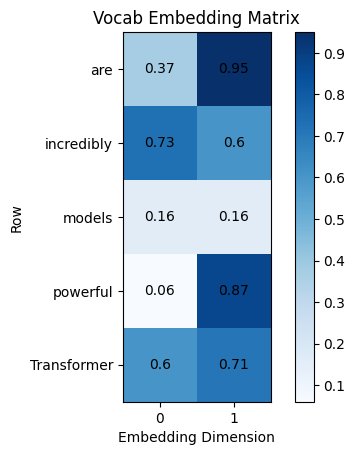

In [24]:

from common import *
np.random.seed(42) # setting the seed for reproducibility

text_seq = "Transformer models are incredibly powerful"

inp_seq = text_seq.split() # split the text into words

# Tokenize the text and sort the tokens alphabetically
tokens = sorted(set(text_seq.split()), key=lambda x: x.lower())

# considering the tokens as the vocabulary
vocab_size = len(tokens) 

tok2pos = {tok: i for i, tok in enumerate(tokens)}  # token to position mapping in vocab
pos2token =   {i: tok for i, tok in enumerate(tokens)} # position to token mapping in vocab

# create a embedding matrix (random init) with shape (vocab_size, embedding_dim), embedding dim = 2 for eazy visualization
embedding_dim = 2
embedding_matrix = np.random.rand(vocab_size, embedding_dim).round(2)

# get the input sequence encoding 
encoding = get_encoding(embedding_matrix, inp_seq, tok2pos)
print(encoding)
seq_encoding = np.array([encoding[token] for token in encoding.keys()])

print(embedding_matrix.shape)
plot = plot_matrix(embedding_matrix, xlabels=tok2pos.keys())
plot.show()

After encoding without positional encoding , all the tokens can be represented in two dimensions.

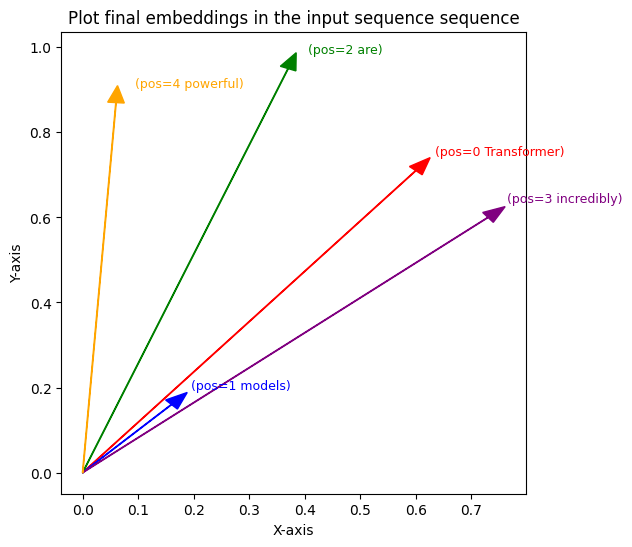

In [25]:
plot = get_plot(seq_encoding, pos2token, inp_seq)
plot.show()

To vizualize the encoding without the positional encoding we can take an example where all the tokens in the input sequence are same.
It is clearly visible that the token will be represented by the same encoding which makes it no different than other tokens in the sequence. This will limit the transformer from learning the order of tokens in the text.

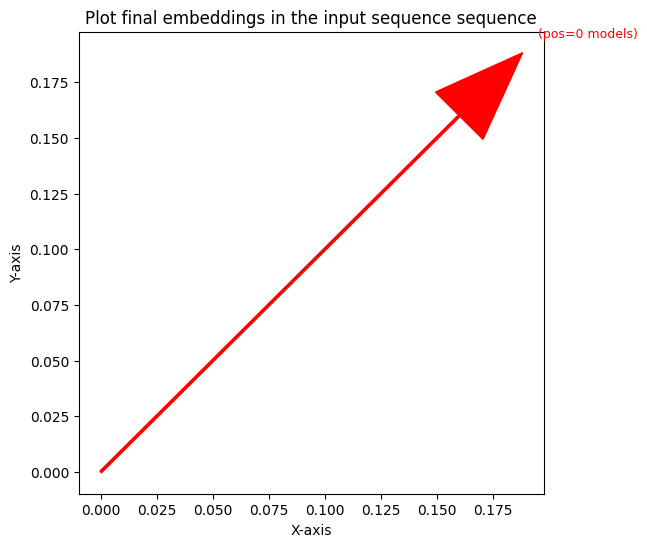

In [26]:
inp_text = "models models models models models"
inp_seq = [x for x in inp_text.split()]
encoding = get_encoding(embedding_matrix, inp_seq, tok2pos)
seq_encoding = np.array([encoding[token] for token in encoding.keys()])
plot = get_plot(seq_encoding, pos2token, inp_seq)
plot.show()

Positional Encoding
-------------------

Positional encoding was introduced in the original Transformer model in the paper titled "Attention Is All You Need," published by Vaswani et al. in 2017. This paper marked a breakthrough in natural language processing (NLP) by proposing the Transformer architecture, which relies entirely on self-attention mechanisms, removing the need for recurrent or convolutional layers typically used in models like RNNs or CNNs.

Taking the same sequence again, "Transformer models are incredibly powerful". We can calculate the positional encoding as mentioned in the paper where

Where:

* pos is the position of the word in the sentence.
* i is the dimension index of the embedding. (dmodel or n_embed in the example above)
* dmodel is the dimensionality of the word embeddings (or the model’s hidden size). Represented by n_embed 
* theta is a constant chosen to scale the position appropriately across dimensions.

In [27]:
theta = 10000.0
seq_pe = positional_encoding(seq_len=5, n_embed=2, theta=theta)
print(seq_pe)

[[ 0.     1.   ]
 [ 0.841  0.54 ]
 [ 0.909 -0.416]
 [ 0.141 -0.99 ]
 [-0.757 -0.654]]


As per the Attention paper, the positional encodings are added to the token embeddings in input sequence. It is clearly visible that every token in the text sequence "models models models models models" is represented differently in 2-d. This gives model the capability to learn the word order in any text sequence. 

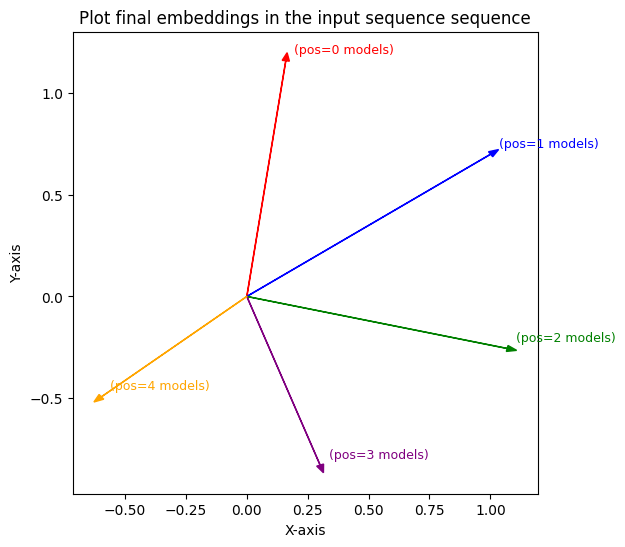

In [28]:
matrix = seq_encoding + seq_pe
plot = get_plot(matrix, pos2token, inp_seq)
plot.show()

Additional readings / Reference
-------------------------------
Attention is all you need paper, Vaswani (https://arxiv.org/abs/1706.03762)

RoPE (Rotary positional embeddings) explained: The positional workhorse of modern LLMs -> https://www.youtube.com/watch?v=GQPOtyITy54

Code for the notebook --> https://github.com/Kunal627/kunal627.github.io